In [1]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import random
# зафиксируем сид для воспроизводимости генерации
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

## Критерии вида t-test

### Одновыборочный

Дана одна нормальная выборка $X_1, ..., X_n \sim \mathcal{N}(a, \sigma^2)$.

Критерий проверяет гипотезы

$\mathsf{H}_0\colon a = a_0$

$\mathsf{H}_1\colon a \not= a_0$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp">`ttest_1samp`</a>`(a, popmean): statistic, pvalue`

* `a` &mdash; выборка
* `popmean` &mdash; равно $a_0$

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и с помощью критерия проверьте:
- равенство среднего нулю 
- равенство среднего 0.5

In [10]:
size=100

sample = sps.norm.rvs(size=size)
print('равенство среднего нулю:', sps.ttest_1samp(a=sample, popmean=0))
print('равенство среднего 0.5:', sps.ttest_1samp(a=sample, popmean=0.5))

равенство среднего нулю: Ttest_1sampResult(statistic=-0.1825574585944797, pvalue=0.8555185826021907)
равенство среднего 0.5: Ttest_1sampResult(statistic=-4.804589504152354, pvalue=5.523160618480314e-06)


Вывод: гипотезу о равенстве среднего нулю не отвергаем, т.к. получили значение статистики по модулю не больше z квантиля (и pvalue больше чем alpha=0.05)\
гипотезу о равенстве среднего 0.5 отклоняем уверенно т.к. pvalue сильно меньше альфа=0.05

### Двухвыборочный

#### Независимые выборки

Даны две независимые нормальные выборки

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">`ttest_ind`</a>`(a, b, equal_var=True): statistic, pvalue`

`a`, `b` &mdash; выборка

`equal_var` &mdash; известно ли равенство дисперсий

Сгенерируйте выборки $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и $X_1, ..., X_m \sim \mathcal{N}(1, 1)$. Используя критерий, проверьте равенство средних двух выборок.

In [14]:
n = 100 
m = 110

sample_1 = sps.norm(loc=0, scale=1).rvs(size=n)
sample_2 = sps.norm(loc=1, scale=1).rvs(size=m)
sps.ttest_ind(sample_1, sample_2, equal_var=True)

Ttest_indResult(statistic=-7.878192833578114, pvalue=1.8228349569436616e-13)

Вывод: основную гипотезу о том что средние двух выборок равны отвергаем очень уверенно т.к. значение pvalue сильно меньше уровня значимости 0.05

Сгенерируйте выборки $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и $X_1, ..., X_m \sim \mathcal{N}(1, 7)$. Используя критерий, проверьте равенство средних двух выборок.

In [18]:
n = 100 
m = 110

sample_1 = sps.norm(loc=0, scale=1).rvs(size=n)
sample_2 = sps.norm(loc=1, scale=7).rvs(size=m)
sps.ttest_ind(sample_1, sample_2, equal_var=False)

Ttest_indResult(statistic=-2.016735438506981, pvalue=0.04605746614153753)

равенства средних нет (отклоняем основную гипотезу о равенстве), пвалью меньше 0.05 но не сильно, уверенность слабая

#### Связные выборки

Даны две связные нормальные выборки

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_n \sim \mathcal{N}(a_2, \sigma_2^2)$.


Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">`ttest_rel`</a>`(a, b): statistic, pvalue`

`a`, `b` &mdash; выборка

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Вторую сгенерируйте по формуле выборка_1 + случайный шум, случайный шум из  $\mathcal{N}(0, 0.5)$. Используя критерий, проверьте гипотезу о равенстве среднего.

In [33]:
sample_1 = sps.norm.rvs(size=n)
shum = sps.norm(scale=0.5).rvs(size=n)
sample_2 = sample_1 + shum 
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=0.3037139969793346, pvalue=0.7619831799115698)

в данной реализации не отклоняем значение статистики по модулю не превышает значение соответствующего квантиля(и пвалью больше 0.05), однако плохой критерий (не достаточно мощный) (получали пвалью как больше 0.05 так и меньше в зависимости от n).

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Вторую сгенерируйте по формуле выборка_1 + случайный шум, случайный шум из  $\mathcal{N}(0.5, 0.5)$. Используя критерий, проверьте гипотезу о равенстве среднего.

In [24]:
sample_1 = sps.norm.rvs(size=n)
shum = sps.norm(loc=0.5, scale=0.5).rvs(size=n)
sample_2 = sample_1 + shum 
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=-11.103175649473078, pvalue=4.364801471406812e-19)

отклоняем гипотезу о равенстве средних пвалью сильноо меньше 0.05

### Пример: ирисы Фишера

Визуализация данных

D:\anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


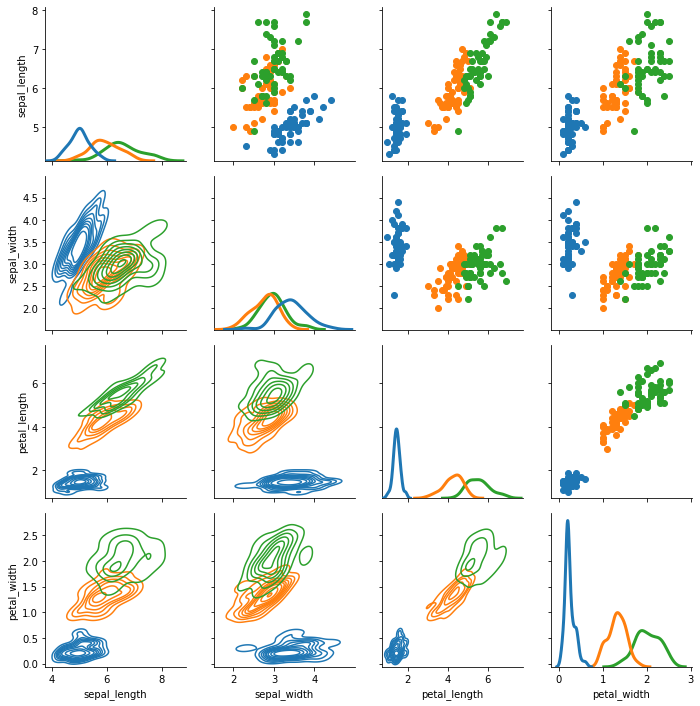

In [25]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species')
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Как выглядят данные

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Виды ирисов

In [27]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
sps.ttest_ind(df[df.species == 'setosa'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [29]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

Ttest_indResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07)

In [30]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_width, 
              df[df.species == 'versicolor'].sepal_width,
              equal_var=False)

Ttest_indResult(statistic=3.2057607502218186, pvalue=0.001819483482104968)

*Замечание.* Строго говоря, неоходима поправка на множественное тестирование гипотез.

**Вывод** каждый раз пвалью меньше уровня значимости, отклоняем гипотезу о равенстве средних но при многократном тестировании результаты сильно могут различаться

## Множественная проверка гипотез

С помощью статистических методов можно проверить человека на наличие экстрасенсорных способностей: предложим ему угадать последовательность, состоящую из двух цветов, длины 100. 

Сформулируем задачу на статистическом языке: 

$X_1...X_{100}$ &mdash; выборка из распределения $Bern(p)$

$p=0.5$ отвечает случайному угадыванию.

Проверьте гипотезу: $\mathsf{H}_0 \colon p=0.5$ vs $\mathsf{H}_1 \colon p \neq 0.5$. Используйте критерий Вальда.

В качестве асимптотически нормальной оценки можно использовать $\widehat{p} = \overline{X}$ с асимптотической дисперсией $\sigma^2(p) = p (1 - p)$.

Выпишем состоятельную оценку дисперсии и статистику критерия Вальда:

$\widehat{\sigma} = \sqrt{\overline{X} (1 - \overline{X})}$, $W = \sqrt{n} \frac{\overline{X} - 0.5}{\sqrt{\overline{X} (1 - \overline{X})}}$

Оценим реальный уровень значимости для этого критерия при размере выборки равном 100. К чему он должен быть близок? Для скорости вычислений используйте количество выборок равное $10^3$.

In [34]:
sample_size = 100
sample_count = 1000

theta = 0.5

In [35]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative='two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma
    param alternative: вид альтернативной гипотезы, может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    """

    alpha = 0.05
    z = sps.norm.ppf(1 - alpha/2)
    n = len(sample)
    statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma

    if alternative == 'two_sided':
        p_value = sps.norm.sf(np.abs(statistic)) + sps.norm.cdf(-np.abs(statistic))
        conf_int = round(estimation_theta - z*estimation_sigma/np.sqrt(n), 4), round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4)


    elif alternative == 'less':
        p_value = sps.norm.cdf(statistic)
        conf_int = (-np.inf, round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4))

    
    elif alternative == 'greater':
        p_value = sps.norm.sf(statistic)
        conf_int = (round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4), np.inf)

    else:
        raise ValueError('alternative name is wrong')

    return statistic, p_value, conf_int

Оценим реальный уровень значимости

In [41]:
sample = sps.bernoulli(p=theta).rvs(size=(sample_count, sample_size))

estimation_theta = np.array([np.mean(sample[i]) for i in range(sample_count)])
estimation_sigma = np.sqrt(estimation_theta*(1-estimation_theta))
alpha = 0.05

counter = 0

for i in range(sample_count):
    _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
    is_rejected = p_value < alpha
    if is_rejected:
        counter += 1
        
counter / sample_count
        


0.059

Теперь представим, что мы хотим проверить большое количество людей на экстрасенсорные способности с помощью данного критерия.

Проведите аналогичный эксперимент: сгенерируйте $10^3$ выборок размера $100$ для $100$ людей. Посчитайте, сколько раз из 1000 в вашем наборе из 100 выборок хотя бы для одной гипотеза будет отвергнута. 

In [47]:
sample_size = 100
sample_count = 100
sample_all = np.array([sps.bernoulli(p=theta).rvs(size=(sample_count, sample_size)) for j in range(1000)])

counter = 0
for sample in sample_all:
    estimation_theta = np.array([np.mean(sample[i]) for i in range(sample_count)])
    estimation_sigma = np.sqrt(estimation_theta*(1-estimation_theta))

    for i in range(100):
        _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
        is_rejected = p_value < 0.05
        if is_rejected:
            counter += 1
            break

In [48]:
counter / 1000

0.994

**Вывод:** альфа относительно большой (относительно нормирования на размер выборки) получаем большую вероятность отклонить гипотезу об отсутсвии экстрасенсов (p=0.5 т.е. наугад), т.к один экстрасенс среди 100 людей вероятен.

На лекции вы прошли метод, позволяющий не накапливать ошибку 1 рода. В этом методе необходимо использовать уровень значимости, зависящий от количества проверяемых одновременно гипотез. 

**Чему равен этот уровень значимости, если одновременно проверяются n гипотез?**

**Ответ:** alpha/n

Проведите предыдущий эксперимент с использованием корректной процедуры. Поскольку в реализованной выше функции $\alpha$ зафиксировано, используйте критерий отвержения гипотезы с помощью p-value.

In [51]:
sample_size = 100
sample_count = 100
sample_all = np.array([sps.bernoulli(p=theta).rvs(size=(sample_count, sample_size)) for j in range(1000)])

counter = 0
for sample in sample_all:
    estimation_theta = np.array([np.mean(sample[i]) for i in range(sample_count)])
    estimation_sigma = np.sqrt(estimation_theta*(1-estimation_theta))

    for i in range(100):
        _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
        is_rejected = p_value < 0.05/100
        if is_rejected:
            counter += 1
            break      

In [52]:
counter / 1000

0.085

**Вывод:** при множественной проверке гипотез мы хотим учитывать накопление ошибки первого рода, поэтому в отдельных экспериментах уменьшаем значение альфа, получаем один экстрасенс среди 100 людей есть уже с меньшей вероятностью что ближе к реальности и критерий такой лучше, т.е. при уменьшенном альфа мы отклоняем гипотезу о выборе "ненаугад" гораздо реже